In [5]:
%pip install pyautogen --quiet

Note: you may need to restart the kernel to use updated packages.


In [11]:
import os
from autogen import AssistantAgent, UserProxyAgent, config_list_from_dotenv
from dotenv import load_dotenv
load_dotenv()

config_list = [
  {
    "model": "gpt-35-turbo",
    "api_type": "azure",
    "api_key": os.environ['AZURE_OPENAI_API_KEY'],
    "base_url": os.environ['AZURE_OPENAI_ENDPOINT'],
    "api_version": "2024-02-15-preview"
  },    
  {
    "model": "gpt-4",
    "api_type": "azure",
    "api_key": os.environ['AZURE_OPENAI_API_KEY'],
    "base_url": os.environ['AZURE_OPENAI_ENDPOINT'],
    "api_version": "2024-02-15-preview"
  }
]

assistant = AssistantAgent("assistant", llm_config={"config_list": config_list})
user_proxy = UserProxyAgent("user_proxy", 
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    # IMPORTANT: set to True to run code in docker, recommended    
    code_execution_config={
        "work_dir": "coding", 
        "use_docker": False})
chat_res = user_proxy.initiate_chat(
    assistant, 
    message="What date is today? Compare the year-to-date gain for META and TESLA.",
    summary_method="reflection_with_llm"
)

user_proxy (to assistant):

What date is today? Compare the year-to-date gain for META and TESLA..

--------------------------------------------------------------------------------
assistant (to user_proxy):


To get today's date, I will use Python to print the current date. After that, I will compare the year-to-date gain for META and TESLA using their stock prices from the start of the year until today.

Here's the Python code to get today's date:
```python
# filename: get_date.py
from datetime import date

today = date.today()
print(today)
```

Once we have the current date, I will proceed to obtain the year-to-date gain for META and TESLA.

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING CODE BLOCK 0 (inferred language is python)...
user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 
2024-03-09


--------------------------------------------------------------------------------
assistant (to user_proxy):

Gr

In [12]:
print("Chat history:", chat_res.chat_history)

print("Summary:", chat_res.summary)
print("Cost info:", chat_res.cost)

Chat history: [{'content': 'What date is today? Compare the year-to-date gain for META and TESLA..', 'role': 'assistant'}, {'content': "\nTo get today's date, I will use Python to print the current date. After that, I will compare the year-to-date gain for META and TESLA using their stock prices from the start of the year until today.\n\nHere's the Python code to get today's date:\n```python\n# filename: get_date.py\nfrom datetime import date\n\ntoday = date.today()\nprint(today)\n```\n\nOnce we have the current date, I will proceed to obtain the year-to-date gain for META and TESLA.", 'role': 'user'}, {'content': 'exitcode: 0 (execution succeeded)\nCode output: \n2024-03-09\n', 'role': 'assistant'}, {'content': "Great! Today's date is March 9, 2024.\n\nNow, let's move on to compare the year-to-date gain for META and TESLA.\n\nTo do this, I will retrieve the stock prices for META and TESLA at the beginning of the year and today. Then, I will calculate the year-to-date gain for each by 

In [20]:
# followup of the previous question
user_proxy.send(
    recipient=assistant,
    message="""Plot a normalized stock price change line chart and save to stock_price_ytd.png""",
)

user_proxy (to assistant):

Plot a normalized stock price change line chart and save to stock_price_ytd.png

--------------------------------------------------------------------------------
assistant (to user_proxy):

To create a normalized stock price change line chart and save it as "stock_price_ytd.png," I'll use the yfinance library to obtain the historical stock prices for NVIDIA (NVDA) and TESLA. Then, I'll normalize the prices and create the line chart using matplotlib.

Here's the updated Python code to accomplish this:
```python
# filename: normalized_stock_price_change_line_chart.py
import yfinance as yf
import matplotlib.pyplot as plt

# Function to get stock prices YTD and normalize
def get_normalized_stock_prices_ytd(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(start="2024-01-01", end="2024-03-09")  # Replace with actual start and end dates
    return (hist['Close'] / hist['Close'][0]) * 100  # Normalizing to start at 100

# Get and normalize stock price

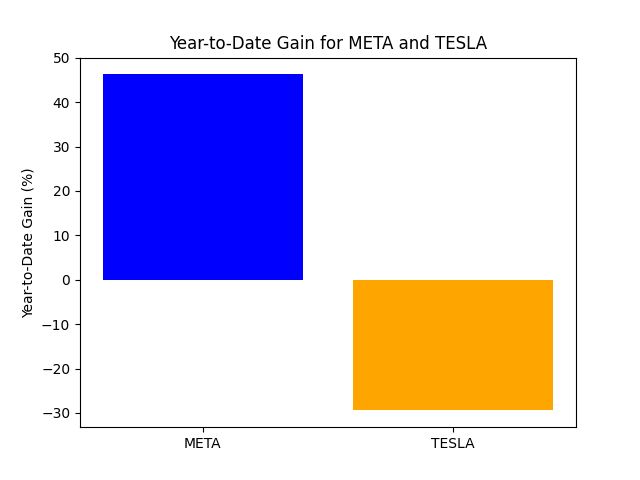

In [15]:
from IPython.display import display, Image

try:
    image = Image(filename="coding/stock_price_ytd.png")
    display(image)
except FileNotFoundError:
    print("Image not found. Please check the file name and modify if necessary.")